In [32]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from cv2 import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D,Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from scipy import misc
from tensorflow.keras.models import load_model
import imutils
import pickle
from PIL import Image,ImageEnhance
from tensorflow import keras
import pandas as pd

In [33]:
# defining the path for datasets.
dataset_path = 'images'
# define classes
classes = ['Phones','Laptop','Flask']

In [34]:
# defining the image sizes
imgSize1 = 240
imgSize2 = 240
figure_size = 9 

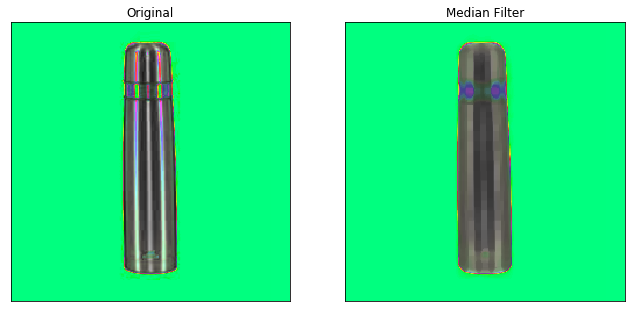

In [35]:
# remove noises from images using median filter
for cls in classes:
    path = os.path.join(dataset_path,cls)
    class_index = classes.index(cls)
    
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path,img))
        image = cv2.resize(image,(imgSize1,imgSize2))
        new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [36]:
img_data = []

# remove noises using gaussian filter and create final image dataset
def createDataset():
    for cls in classes:
        path = os.path.join(dataset_path,cls)
        class_index = classes.index(cls)
    
        for img in os.listdir(path):
            image = cv2.imread(os.path.join(path,img))
            #resize image
            new_image = cv2.resize(image,(imgSize1,imgSize2))
            #convert to grayscale
            new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
            #remove noises
            new_image = cv2.GaussianBlur(new_image, (figure_size, figure_size),0)
            img_data.append([new_image,class_index])
    plt.figure(figsize=(11,6))
    plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Gaussian Filter')
    plt.xticks([]), plt.yticks([])
    plt.show()
            

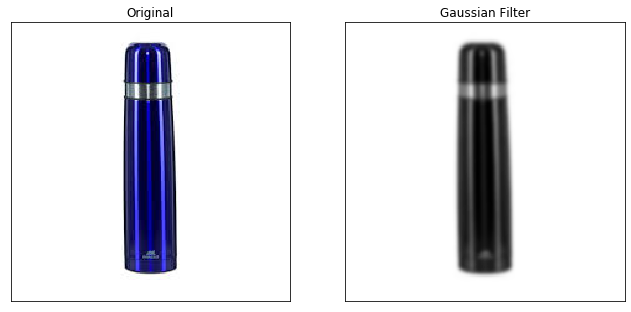

In [37]:
createDataset()

In [38]:
print(len(img_data))

15


In [39]:
# shuffle dataset
random.shuffle(img_data)

In [40]:
x = []
y = []

In [41]:
# extract features and label from image dataset
for features, label in img_data:
    x.append(features)
    y.append(label)

In [42]:
x[10].shape

(240, 240)

In [43]:
len(x)

15

In [44]:
# convert dataset into numpy array
X = np.array(x).reshape(-1,imgSize1,imgSize2,1)
X[0].shape
len(X)

15

In [45]:
# split dataset into training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [46]:
# convert dataset labels to categorical
Y_train = to_categorical(y_train,num_classes=3)
Y_test = to_categorical(y_test,num_classes=3)

In [47]:
# define model layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(240, 240)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [48]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 7,373,315
Trainable params: 7,373,315
Non-trainable params: 0
_________________________________________________________________


In [50]:
n_epochs =20

In [51]:
results = model.fit(x_train,Y_train,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test))

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 307.3332 - accuracy: 0.4000 - val_loss: 18829.9844 - val_accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 108ms/step - loss: 18190.2754 - accuracy: 0.4000 - val_loss: 10149.5098 - val_accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 0s 87ms/step - loss: 18140.5371 - accuracy: 0.2000 - val_loss: 4308.6538 - val_accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 96ms/step - loss: 7354.3213 - accuracy: 0.3000 - val_loss: 11912.0986 - val_accuracy: 0.2000
Epoch 5/20
1/1 [==============================] - 0s 83ms/step - loss: 6430.7417 - accuracy: 0.4000 - val_loss: 12299.9277 - val_accuracy: 0.2000
Epoch 6/20
1/1 [==============================] - 0s 81ms/step - loss: 4146.8423 - accuracy: 0.5000 - val_loss: 11506.1934 - val_accuracy: 0.2000
Epoch 7/20
1/1 [==============================] - 0s 83ms/step - loss: 3461.7466 - accuracy: 0.5000 - val_loss: 13557.2480 - 

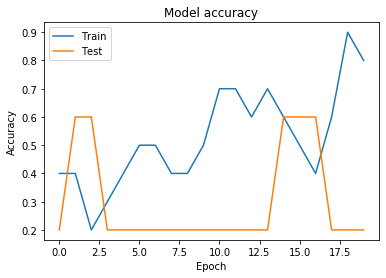

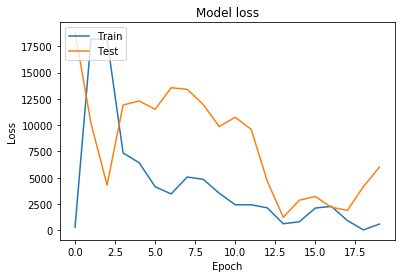

In [52]:
# model accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# model loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model

In [53]:
test_loss, test_acc = model.evaluate(x_test,Y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 28ms/step - loss: 6010.1509 - accuracy: 0.2000
Test accuracy: 0.20000000298023224


# Save the model

In [54]:
model.save('./items-detection.h5')

# Test the model

In [55]:
loaded_model = load_model('items-detection.h5')

In [56]:
testing_dataset = 'testing'
testing_data = []
labels = []

for img in os.listdir(testing_dataset):
    labels.append(img)
    imgArray = cv2.imread(os.path.join(testing_dataset,img),cv2.IMREAD_GRAYSCALE)
    newImg = cv2.resize(imgArray,(imgSize1,imgSize2))
    testing_data.append([newImg])

In [57]:
print(labels)

['1.jpg', '2.jpg', '3.jpg']


In [65]:
test_img = testing_data[2]
test_data = np.array(test_img).reshape(-1,imgSize1,imgSize2,1)

In [66]:
predection = loaded_model.predict(test_data)
np.argmax(predection)

0

In [67]:
product_name = ""

if(np.argmax(predection) == 0):
    print("Type: Phone")
if(np.argmax(predection) == 1):
    print("Type: Laptop")
if(np.argmax(predection) == 2):
    print("Type: Flask")

Type: Phone
